## Q1

### a. The number of parameters

layer1: (3 * 3 * 3 + 1) * 100 = 2,800

layer2: (3 * 3 * 100 + 1) * 200 = 180,200

layer3: (3 * 3 * 200 + 1) * 400 = 720,400

Total number of parameters = layer1 + layer2 + layer3 = 903,400

### b. The size of activation maps

layer1: ((200 - 3) + 1, (300 - 3) +1, 100)) = (198, 298, 100)
    
layer2: ((198 - 3) + 1, (298 - 3) +1, 200)) = (196, 296, 200)
    
layer3: ((196 - 3) + 1, (296 - 3) +1, 400)) = (194, 294, 400)

### C. Zero padding P

When stride = 1,

and F = 3,

Zero padding for layer2


Zero padding for layer3



## Q2

### a. Verifying the number of parameters is reduced

The number of paramaters
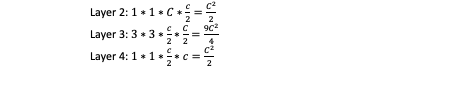

 The total number of parameters
 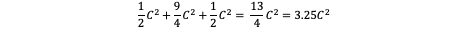

### b. Using smaller filters

1 - The design using 1x1 filter uses a smaller number of parameters,



compares to the design using 3x3 filter’s number of parameters,

2 - The design using 1x1 filter results in a smaller number of computations.

Assume the size of the output activation layer is (M, N)

Design with 3x3 filter:


Design with 1x1 filter:

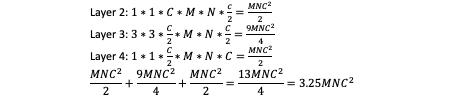

The number of computations for smaller filter are


The number of computations for larger filter are


3 - Design with 1x1 filter incorporates more non-linearity, it has 4 ReLU layers vs the 2 ReLU layers in the 3x3 case, which increases the system’s modeling capacity.

##### Thus, the smaller filter design gives us better performance and make the model runs faster.

## Q3

### a. ConvNet

In [1]:
import os

data_dir = os.path.expanduser('~/Downloads/flower_photos')

print(data_dir)

In [2]:
batch_size = 128

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2) # set validation split)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        data_dir,  # This is the source directory for training images
        target_size=(192, 192),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['daisy','dandelion','roses','sunflowers','tulips'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        subset='training')

test_generator = train_datagen.flow_from_directory(
        data_dir,  # This is the source directory for training images
        target_size=(192, 192),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['daisy','dandelion','roses','sunflowers','tulips'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        subset='validation')

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


Sources: https://www.codegrepper.com/code-examples/whatever/how+to+split+image+dataset+into+training+and+test+set+keras <br> https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator

In [3]:
import keras
keras.__version__
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(192, 192, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 190, 190, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 188, 188, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 94, 94, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 43, 43, 64)        3

In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = test_generator, 
    validation_steps = test_generator.samples // batch_size,
    epochs = 10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
22/22 [==============================] - 163s 7s/step - loss: 4.6309 - accuracy: 0.2255 - val_loss: 1.5835 - val_accuracy: 0.2438
Epoch 2/10
22/22 [==============================] - 182s 8s/step - loss: 1.7268 - accuracy: 0.2988 - val_loss: 2.5873 - val_accuracy: 0.2656
Epoch 3/10
22/22 [==============================] - 186s 8s/step - loss: 1.8028 - accuracy: 0.2906 - val_loss: 1.4012 - val_accuracy: 0.4219
Epoch 4/10
22/22 [==============================] - 203s 9s/step - loss: 1.3556 - accuracy: 0.4397 - val_loss: 1.2270 - val_accuracy: 0.4984
Epoch 5/10
22/22 [==============================] - 205s 9s/step - loss: 1.2958 - accuracy: 0.4906 - val_loss: 1.3261 - val_accuracy: 0.4812
Epoch 6/10
22/22 [==============================] - 203s 9s/step - loss: 1.0824 - accuracy: 0.5660 - val_loss: 1.3513 - val_accuracy: 0.4984
Epoch 7/10
22/22 [==============================] - 206s 9s/step - loss: 1.059

### b. The MobileNet model

In [7]:
from keras.applications import MobileNetV2

conv_base = MobileNetV2(
    input_shape=(192,192,3), #must be "squares"
    include_top=False,
    weights="imagenet"
)

Source: https://keras.io/api/applications/mobilenet/#mobilenetv2-function

In [8]:
import numpy as np

In [9]:
def extract_features(generator, sample_count): #directory not used generator imported directly instead
    features = np.zeros(shape=(sample_count,6,6,1280))
    labels = np.zeros(shape=(sample_count,5))
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [10]:
train_features,train_labels = extract_features(train_generator,2816) #closest multiplier of 128(batch size)
test_features,test_labels = extract_features(test_generator,640) #closest multiplier of 128(batch size)

In [11]:
train_features = np.reshape(train_features, (2816, 6*6*1280))
test_features = np.reshape(test_features, (640, 6*6*1280))

In [17]:
modelt = models.Sequential()
modelt.add(conv_base)
modelt.add(layers.Flatten())
modelt.add(layers.Dense(4096,activation='relu',input_dim=6*6*1280))
modelt.add(layers.Dense(4096,activation='relu'))
modelt.add(layers.Dense(5,activation='softmax'))

In [18]:
modelt.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
modelt.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Functi (None, 6, 6, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 46080)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              188747776 
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 20485     
Total params: 207,807,557
Trainable params: 207,773,445
Non-trainable params: 34,112
_________________________________________________________________


In [20]:
historyt = modelt.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = test_generator, 
    validation_steps = test_generator.samples // batch_size,
    epochs = 10)

Epoch 1/10
22/22 [==============================] - 294s 13s/step - loss: 88.6822 - accuracy: 0.4776 - val_loss: 77.3206 - val_accuracy: 0.2547
Epoch 2/10
22/22 [==============================] - 362s 16s/step - loss: 0.6142 - accuracy: 0.7912 - val_loss: 10.9514 - val_accuracy: 0.3266
Epoch 3/10
22/22 [==============================] - 311s 14s/step - loss: 0.9980 - accuracy: 0.8125 - val_loss: 7.3721 - val_accuracy: 0.5016
Epoch 4/10
22/22 [==============================] - 319s 15s/step - loss: 0.3902 - accuracy: 0.9011 - val_loss: 18.7300 - val_accuracy: 0.4078
Epoch 5/10
22/22 [==============================] - 322s 15s/step - loss: 0.4460 - accuracy: 0.8801 - val_loss: 5.1217 - val_accuracy: 0.5344
Epoch 6/10
22/22 [==============================] - 315s 14s/step - loss: 0.5063 - accuracy: 0.8783 - val_loss: 2.5334 - val_accuracy: 0.6469
Epoch 7/10
22/22 [==============================] - 366s 17s/step - loss: 0.6827 - accuracy: 0.8453 - val_loss: 4.3961 - val_accuracy: 0.6469
Ep

## Conclusion of Q3:

The transfer learning network has gained accuracy faster and and reached a higher convergency at Epoch 7. While both networks might have reached higher accuracies with longer training, as they might get over a saddle in gradient and lower their accuracies like the MobileNet did between Epochs 4 and 5. And regardless of that it seems clear that the conclusions would be unlikely to change, the larger and well trained MobileNet network would reach a much higher accuracy and do so quicker, as it wouldn't have to train the feature detection from scratch and had a much larger model capacity.